In [137]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

import pickle
import os

In [2]:
#load df for ML project from google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Construct the path to your file
file_path = '/content/drive/MyDrive/DS18ML/owid-covid-data.csv'

# Read the CSV file into a pandas DataFrame
try:
  df1 = pd.read_csv(file_path)
  print("File loaded successfully!")

except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the path and ensure your Drive is mounted.")
except Exception as e:
  print(f"An error occurred: {e}")


Mounted at /content/drive
File loaded successfully!


In [123]:
#df=pd.read_csv('CovidData/owid-covid-data.csv')
df = df1.dropna(subset=['continent'])

In [124]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df_filtered = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2023)]
df_filtered.info()

# Replace NaN and empty strings with "NA" in 'continent' and 'tests_units'
df['continent'].fillna("NA", inplace=True)
df['continent'].replace("", "NA", inplace=True)

df['tests_units'].fillna("NA", inplace=True)
df['tests_units'].replace("", "NA", inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    0 non-null      int64         
 1   continent                                   0 non-null      int64         
 2   location                                    0 non-null      int64         
 3   date                                        0 non-null      datetime64[ns]
 4   total_cases                                 0 non-null      float64       
 5   new_cases                                   0 non-null      float64       
 6   new_cases_smoothed                          0 non-null      float64       
 7   total_deaths                                0 non-null      float64       
 8   new_deaths                                  0 non-null      float64       
 9   new_deaths_smoothed        

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  int64         
 1   continent                                   429435 non-null  int64         
 2   location                                    429435 non-null  int64         
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [126]:
df['new_cases_smoothed_per_million'].value_counts()

new_cases_smoothed_per_million
0.000     117056
0.008        624
0.016        497
0.006        491
0.014        484
           ...  
7.454          1
5.379          1
90.350         1
15.670         1
28.842         1
Name: count, Length: 26710, dtype: int64

In [ ]:
# Remove the 0 count
value_counts_no_zeros = value_counts[value_counts.index != 0]

# Create a histogram of the value counts (excluding 0)
plt.figure(figsize=(10, 6))

# Filter to keep only values less than 30
filtered_value_counts = value_counts_no_zeros[value_counts_no_zeros.index < 30]

# Create the histogram
plt.hist(filtered_value_counts.values, bins=2000)  # Adjust the number of bins as needed
plt.title('Histogram of Value Counts (Excluding 0) for new_cases_smoothed_per_million (X-axis < 30)')
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.xlim(0, 29) # Set the x-axis limit
plt.show()

# Optional: Print out the values that were excluded.
excluded_values = value_counts_no_zeros[value_counts_no_zeros.index >= 30]
print("Excluded Values (>= 30):")
print(excluded_values)

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_against_year_month(df):
    """
    Creates scatter plots for each numeric column against the year-month.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
    """
    #Ensure the date column is a datetime object.
    df['date'] = pd.to_datetime(df['date'])

    #Create a year-month column
    df['year_month'] = df['date'].dt.to_period('M')

    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(12, 6))  # Adjust figure size as needed
        sns.scatterplot(x=df['year_month'].astype(str), y=df[col]) #convert to string for plotting
        plt.title(f'Scatter Plot of {col} vs. Year-Month')
        plt.xlabel('Year-Month')
        plt.ylabel(col)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout() #prevents labels from being cut off
        plt.show()

df_to_plot = df

plot_scatter_against_year_month(df_to_plot)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Type of data
df.dtypes.to_excel ("df_datatype.xlsx", sheet_name='data_types')

#Maximum points
df.max().to_excel("df_max.xlsx", sheet_name='max')

#Minimum points
df.min().to_excel("df_min.xlsx", sheet_name='min')

#Isnull values
df.isnull().to_excel("df_isnull.xlsx", sheet_name='isnull')

#unique values
df.nunique().to_excel("df_nunique.xlsx", sheet_name='nunique')

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(file_path)

Output hidden; open in https://colab.research.google.com to view.

In [63]:
df.describe()

date   total_cases     new_cases  \
count                         402910  3.917160e+05  3.900710e+05   
mean   2022-04-18 09:33:33.108634368  1.827082e+06  1.989215e+03   
min              2020-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-02-28 00:00:00  5.516000e+03  0.000000e+00   
50%              2022-04-17 00:00:00  5.093700e+04  0.000000e+00   
75%              2023-06-07 00:00:00  5.610120e+05  0.000000e+00   
max              2024-08-14 00:00:00  1.034368e+08  4.047548e+07   
std                              NaN  7.857184e+06  8.585827e+04   

       new_cases_smoothed  total_deaths     new_deaths  new_deaths_smoothed  \
count        3.889010e+05  3.917160e+05  390520.000000        389350.000000   
mean         1.995095e+03  2.044839e+04      18.080989            18.133540   
min          0.000000e+00  0.000000e+00       0.000000             0.000000   
25%          0.000000e+00  3.700000e+01       0.000000             0.000000   
50%          8.714000e+00  6.580000e+02       0.000000             0.000000   
75%          2.040000e+02  7.378000e+03       0.000000             2.000000   
max          5.782211e+06  1.193165e+06   47687.000000          6812.429000   
std          3.244760e+04  8.262329e+04     314.885156           118.004772   

       total_cases_per_million  new_cases_per_million  \
count            391716.000000          390071.000000   
mean             112935.033392             123.293989   
min                   0.000000               0.000000   
25%                1746.769000               0.000000   
50%               28990.236000               0.000000   
75%              156815.110000               0.000000   
max              763598.600000          241758.230000   
std              164016.921202            1539.072681   

       new_cases_smoothed_per_million  ...   male_smokers  \
count                   388901.000000  ...  242133.000000   
mean                       123.653496  ...      33.087032   
min                          0.000000  ...       7.700000   
25%                          0.000000  ...      22.600000   
50%                          2.409000  ...      33.100000   
75%                         53.604000  ...      41.500000   
max                      34536.890000  ...      78.100000   
std                        571.224591  ...      13.901445   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count           160057.000000               289005.000000    388615.000000   
mean                50.549515                    3.109254        73.706961   
min                  1.188000                    0.100000        53.280000   
25%                 19.351000                    1.300000        69.500000   
50%                 49.542000                    2.500000        75.050000   
75%                 83.241000                    4.210000        79.460000   
max                100.000000                   13.800000        86.750000   
std                 32.057878                    2.556436         7.403534   

       human_development_index    population  \
count            317443.000000  4.029100e+05   
mean                  0.722060  3.338239e+07   
min                   0.394000  4.700000e+01   
25%                   0.602000  3.957620e+05   
50%                   0.740000  5.466000e+06   
75%                   0.829000  2.212524e+07   
max                   0.957000  1.425887e+09   
std                   0.149293  1.348128e+08   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
count                          1.341100e+04                 13411.000000   
mean                           5.604765e+04                     9.766431   
min                           -3.772610e+04                   -44.230000   
25%                            1.765000e+02                     2.060000   
50%                            6.815199e+03                     8.130000   
75%                            3.912804e+04        

In [64]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
con_df = df[numerical_cols]

**Skewness**

In [128]:
#
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

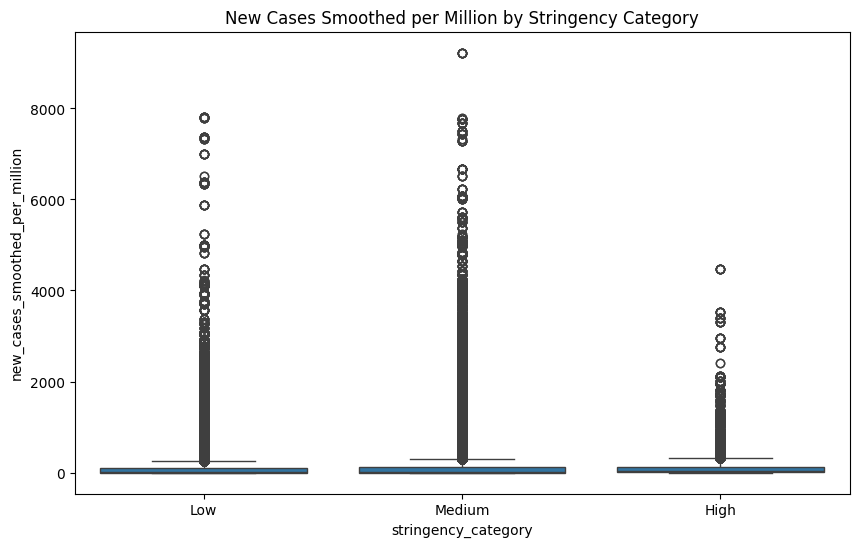

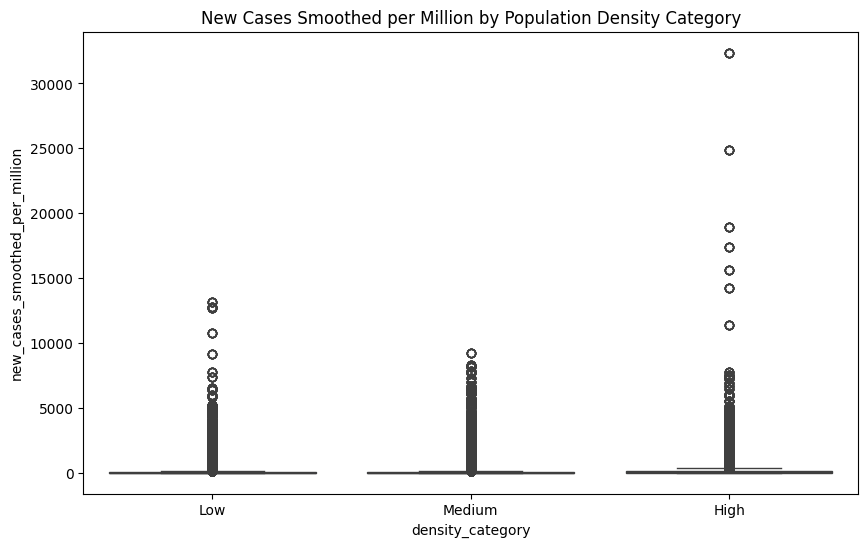

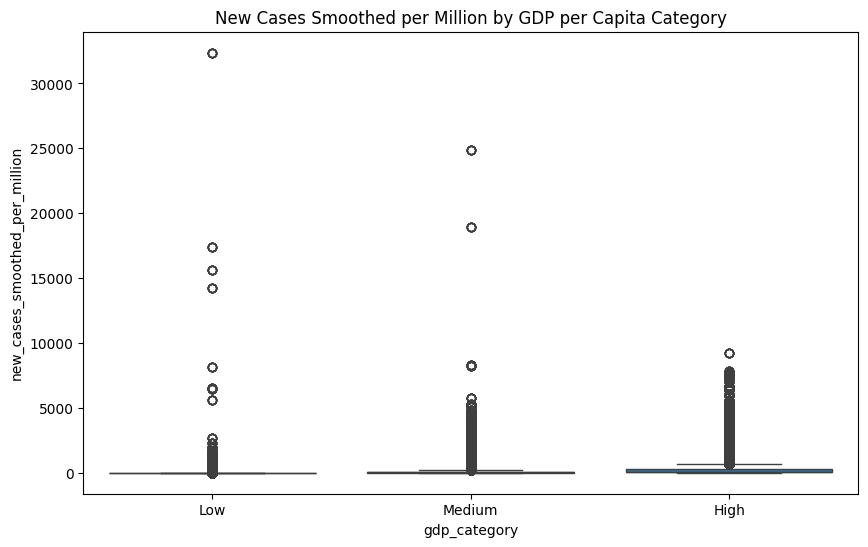

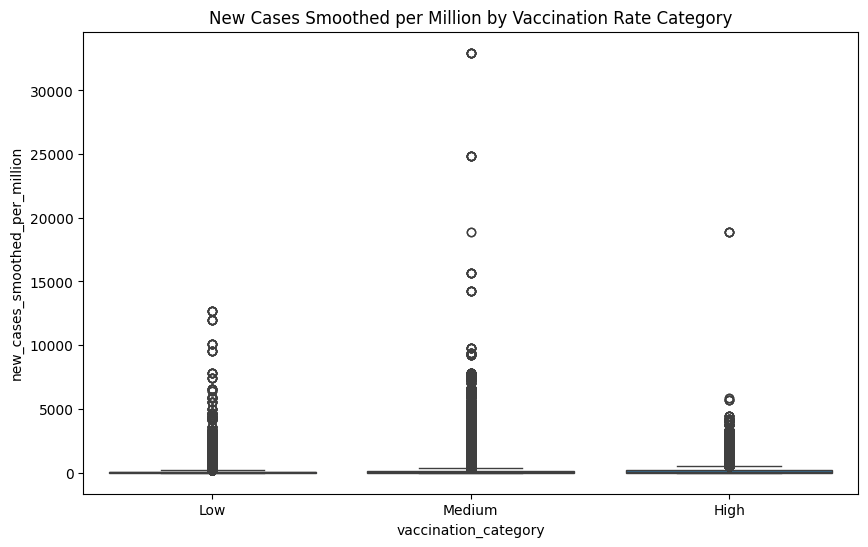

Stringency Index Mann-Whitney U Test: (1018867952.5, 0.0)

Stringency Index Kruskal-Wallis H Test: (4163.80719431389, 0.0)

Mean New Cases Smoothed per Million by Stringency Category: stringency_category
Low       153.568834
Medium    183.305689
High      114.989783
Name: new_cases_smoothed_per_million, dtype: float64

Population Density Kruskal-Wallis H Test: (2864.966555472979, 0.0)

Mean New Cases Smoothed per Million by Population Density Category: density_category
Low       100.894305
Medium    114.084489
High      190.181483
Name: new_cases_smoothed_per_million, dtype: float64

GDP per Capita Kruskal-Wallis H Test: (57454.89654329043, 0.0)

Mean New Cases Smoothed per Million by GDP per Capita Category: gdp_category
Low        18.703985
Medium     96.848980
High      274.819030
Name: new_cases_smoothed_per_million, dtype: float64

Vaccination Rate Kruskal-Wallis H Test: (5192.870562800039, 0.0)

Mean New Cases Smoothed per Million by Vaccination Rate Category: vaccination_categor

In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame with the provided data

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame for years 2020 to 2023
df_filtered = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2023)]

# Dictionary to store results
results = {}

# 1. Stringency Index Analysis

# Create stringency categories
df_filtered['stringency_category'] = pd.cut(df_filtered['stringency_index'], bins=[0, 33, 66, 101], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values for stringency analysis
df_stringency = df_filtered.dropna(subset=['stringency_category', 'new_cases_smoothed_per_million'])

# Mann-Whitney U Test for Low vs High stringency
low_stringency = df_stringency[df_stringency['stringency_category'] == 'Low']['new_cases_smoothed_per_million']
high_stringency = df_stringency[df_stringency['stringency_category'] == 'High']['new_cases_smoothed_per_million']

u_stat, p_value = stats.mannwhitneyu(low_stringency, high_stringency)
results['Stringency Index Mann-Whitney U Test'] = (float(u_stat), float(p_value))

# Kruskal-Wallis H Test for all stringency categories
kruskal_stat, p_value = stats.kruskal(
    df_stringency[df_stringency['stringency_category'] == 'Low']['new_cases_smoothed_per_million'],
    df_stringency[df_stringency['stringency_category'] == 'Medium']['new_cases_smoothed_per_million'],
    df_stringency[df_stringency['stringency_category'] == 'High']['new_cases_smoothed_per_million']
)
results['Stringency Index Kruskal-Wallis H Test'] = (float(kruskal_stat), float(p_value))

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stringency_category', y='new_cases_smoothed_per_million', data=df_stringency)
plt.title('New Cases Smoothed per Million by Stringency Category')
plt.show()

# Calculate mean per category for Stringency Index
mean_stringency = df_stringency.groupby('stringency_category')['new_cases_smoothed_per_million'].mean()
results['Mean New Cases Smoothed per Million by Stringency Category'] = mean_stringency

# 2. Population Density Analysis

# Create population density categories using IQRs
Q1_density = df_filtered['population_density'].quantile(0.25)
Q3_density = df_filtered['population_density'].quantile(0.75)
IQR_density = Q3_density - Q1_density

df_filtered['density_category'] = pd.cut(df_filtered['population_density'], bins=[-np.inf, Q1_density, Q3_density, np.inf], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values for density analysis
df_density = df_filtered.dropna(subset=['density_category', 'new_cases_smoothed_per_million'])

# Kruskal-Wallis H Test for all density categories
kruskal_stat, p_value = stats.kruskal(
    df_density[df_density['density_category'] == 'Low']['new_cases_smoothed_per_million'],
    df_density[df_density['density_category'] == 'Medium']['new_cases_smoothed_per_million'],
    df_density[df_density['density_category'] == 'High']['new_cases_smoothed_per_million']
)
results['Population Density Kruskal-Wallis H Test'] = (float(kruskal_stat), float(p_value))

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='density_category', y='new_cases_smoothed_per_million', data=df_density)
plt.title('New Cases Smoothed per Million by Population Density Category')
plt.show()

# Calculate mean per category for Population Density
mean_density = df_density.groupby('density_category')['new_cases_smoothed_per_million'].mean()
results['Mean New Cases Smoothed per Million by Population Density Category'] = mean_density

# 3. GDP per Capita Analysis

# Create GDP per capita categories using IQRs
Q1_gdp = df_filtered['gdp_per_capita'].quantile(0.25)
Q3_gdp = df_filtered['gdp_per_capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

df_filtered['gdp_category'] = pd.cut(df_filtered['gdp_per_capita'], bins=[-np.inf, Q1_gdp, Q3_gdp, np.inf], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values for GDP analysis
df_gdp = df_filtered.dropna(subset=['gdp_category', 'new_cases_smoothed_per_million'])

# Kruskal-Wallis H Test for all GDP categories
kruskal_stat, p_value = stats.kruskal(
    df_gdp[df_gdp['gdp_category'] == 'Low']['new_cases_smoothed_per_million'],
    df_gdp[df_gdp['gdp_category'] == 'Medium']['new_cases_smoothed_per_million'],
    df_gdp[df_gdp['gdp_category'] == 'High']['new_cases_smoothed_per_million']
)
results['GDP per Capita Kruskal-Wallis H Test'] = (float(kruskal_stat), float(p_value))

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gdp_category', y='new_cases_smoothed_per_million', data=df_gdp)
plt.title('New Cases Smoothed per Million by GDP per Capita Category')
plt.show()

# Calculate mean per category for GDP per Capita
mean_gdp = df_gdp.groupby('gdp_category')['new_cases_smoothed_per_million'].mean()
results['Mean New Cases Smoothed per Million by GDP per Capita Category'] = mean_gdp

# 4. New People Vaccinated Smoothed per Hundred Analysis

# Create vaccination categories using IQRs
Q1_vaccination = df_filtered['new_people_vaccinated_smoothed_per_hundred'].quantile(0.25)
Q3_vaccination = df_filtered['new_people_vaccinated_smoothed_per_hundred'].quantile(0.75)
IQR_vaccination = Q3_vaccination - Q1_vaccination

df_filtered['vaccination_category'] = pd.cut(df_filtered['new_people_vaccinated_smoothed_per_hundred'], bins=[-np.inf, Q1_vaccination, Q3_vaccination, np.inf], labels=['Low', 'Medium', 'High'])

# Drop rows with missing values for vaccination analysis
df_vacc = df_filtered.dropna(subset=['vaccination_category', 'new_cases_smoothed_per_million'])

# Kruskal-Wallis H Test for all vaccination categories
kruskal_stat, p_value = stats.kruskal(
    df_vacc[df_vacc['vaccination_category'] == 'Low']['new_cases_smoothed_per_million'],
    df_vacc[df_vacc['vaccination_category'] == 'Medium']['new_cases_smoothed_per_million'],
    df_vacc[df_vacc['vaccination_category'] == 'High']['new_cases_smoothed_per_million']
)
results['Vaccination Rate Kruskal-Wallis H Test'] = (float(kruskal_stat), float(p_value))

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='vaccination_category', y='new_cases_smoothed_per_million', data=df_vacc)
plt.title('New Cases Smoothed per Million by Vaccination Rate Category')
plt.show()

# Calculate mean per category for Vaccination Rate
mean_vacc = df_vacc.groupby('vaccination_category')['new_cases_smoothed_per_million'].mean()
results['Mean New Cases Smoothed per Million by Vaccination Rate Category'] = mean_vacc

# 5. Spearman's Rank Correlation

# Spearman's Rank Correlation between new cases smoothed per million and population density
spearman_corr, p_value = stats.spearmanr(df_filtered['new_cases_smoothed_per_million'], df_filtered['population_density'])
results['Spearman\'s Rank Correlation'] = (float(spearman_corr), float(p_value))

# 6. Wilcoxon Signed-Rank Test

# Wilcoxon Signed-Rank Test for new cases smoothed per million before and after a specific date
before_date = df_filtered[df_filtered['date'] < '2021-01-01']['new_cases_smoothed_per_million']
after_date = df_filtered[df_filtered['date'] >= '2021-01-01']['new_cases_smoothed_per_million']

wilcoxon_stat, p_value = stats.wilcoxon(before_date, after_date)
results['Wilcoxon Signed-Rank Test'] = (float(wilcoxon_stat), float(p_value))

# 7. Chi-Square Test

# Chi-Square Test for association between stringency_category and density_category
contingency_table = pd.crosstab(df_filtered['stringency_category'], df_filtered['density_category'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
results['Chi-Square Test'] = (float(chi2_stat), float(p_value), dof)

# Print all results
for test, result in results.items():
    print(f"{test}: {result}")
    print("")

In [ ]:
import plotly.express as px

# Plot histograms using plotly
for col in numerical_cols:
    fig = px.histogram(df, x=col)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

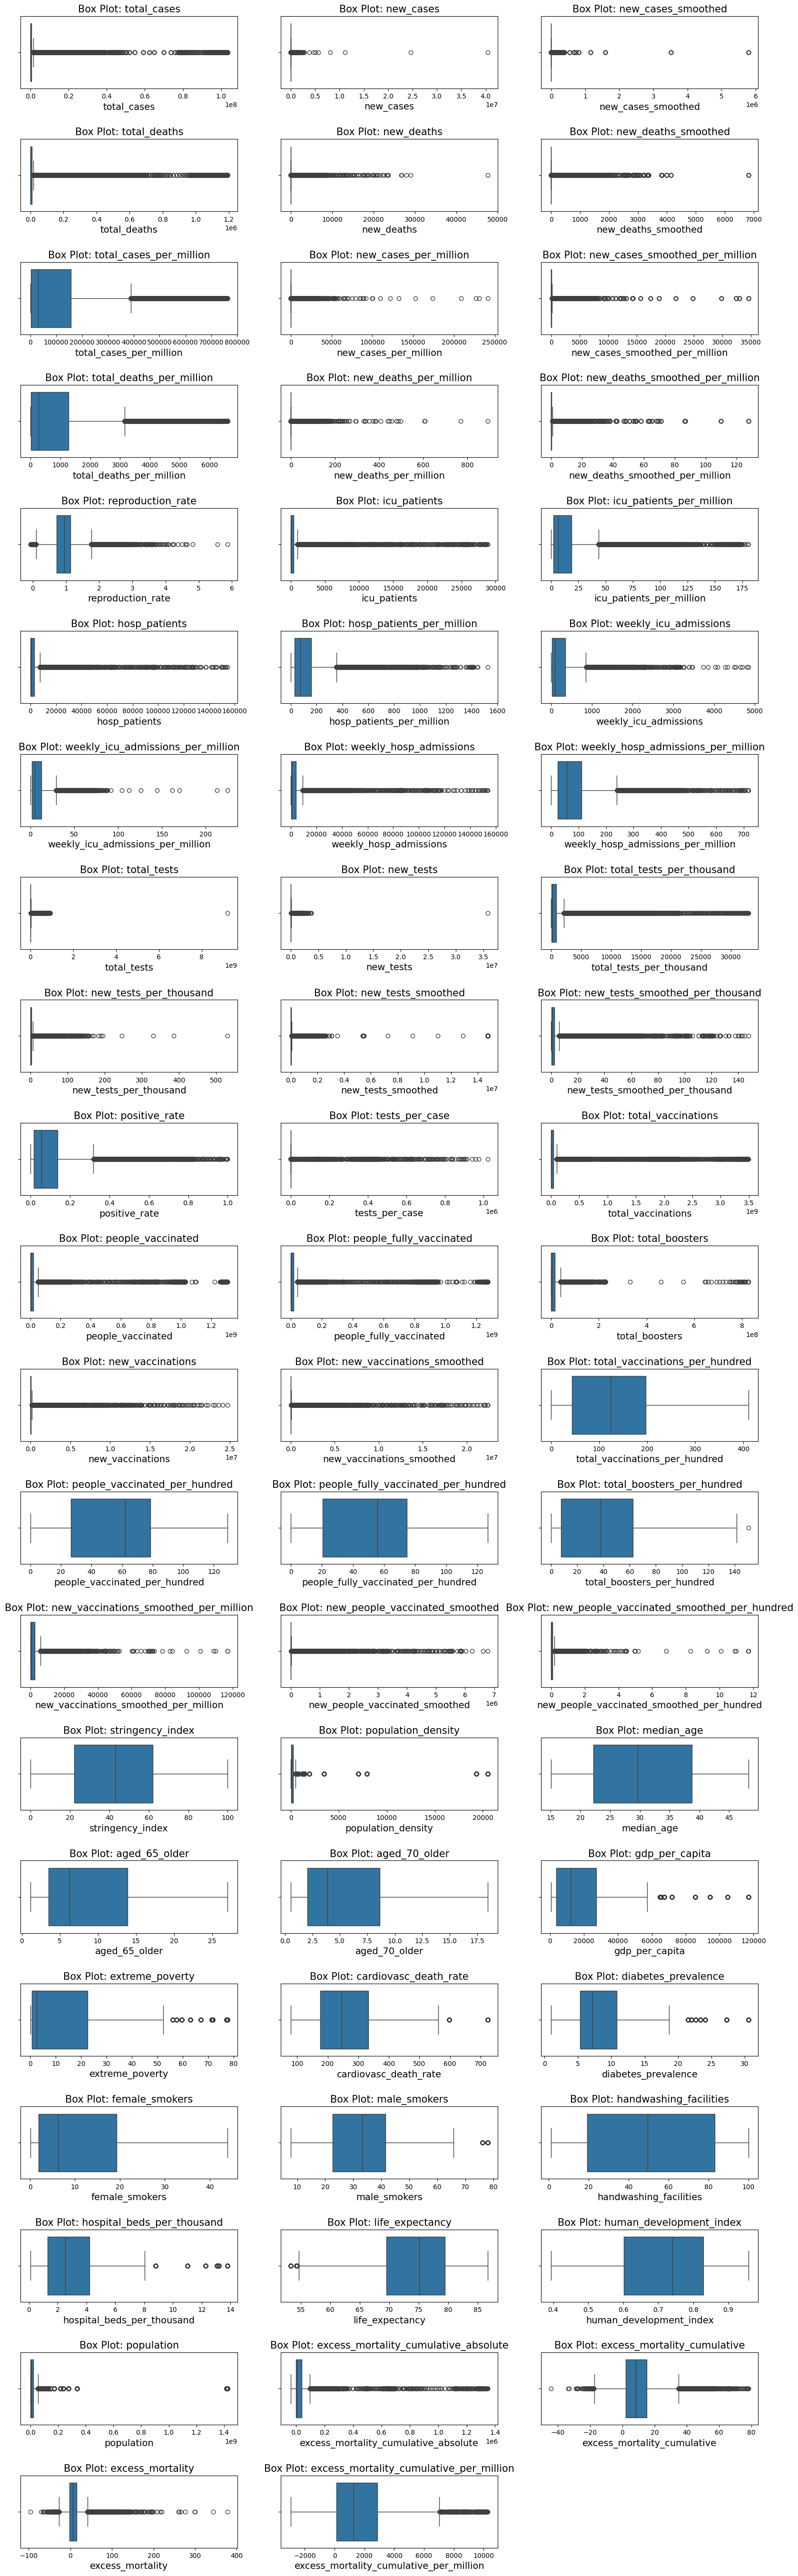

In [69]:
# Boxplot for outliers
plt.figure(figsize=(20, 200))

def outliers_boxplot(df):
    for i, col in enumerate(numerical_cols):
        ax = plt.subplot(60, 3, i+1)
        sns.boxplot(data=df, x=col, ax=ax)
        plt.subplots_adjust(hspace=0.7)
        plt.title('Box Plot: {}'.format(col), fontsize=15)
        plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(df)
plt.show()

In [70]:
#detect outliers
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in numerical_cols:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Call the function and sort results
outliers_df_result = outliers_df(df).sort_values('Percent', ascending=False)
print(outliers_df_result)

                                            Outlier count    Percent
new_deaths_smoothed                               72264.0  17.935519
new_cases_smoothed                                71495.0  17.744658
new_deaths_smoothed_per_million                   68887.0  17.097367
new_cases_smoothed_per_million                    63126.0  15.667519
total_deaths                                      61106.0  15.166166
total_cases                                       59253.0  14.706262
population                                        43225.0  10.728202
total_cases_per_million                           40785.0  10.122608
new_cases_per_million                             38929.0   9.661959
new_cases                                         38929.0   9.661959
population_density                                34255.0   8.501899
new_people_vaccinated_smoothed                    28328.0   7.030851
new_vaccinations_smoothed                         27125.0   6.732273
new_deaths                        

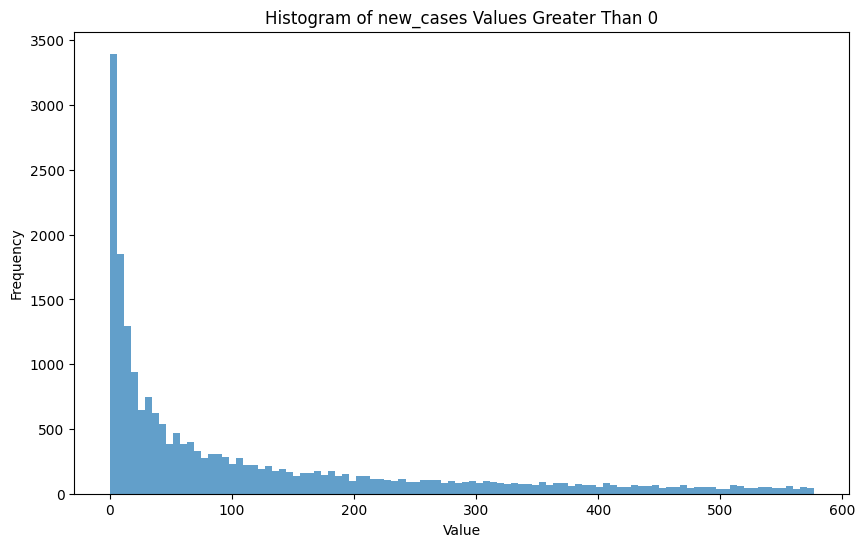

Count of 'new_cases' values greater than 0: 38929
Percentage of 'new_cases' values greater than 0: 9.66%


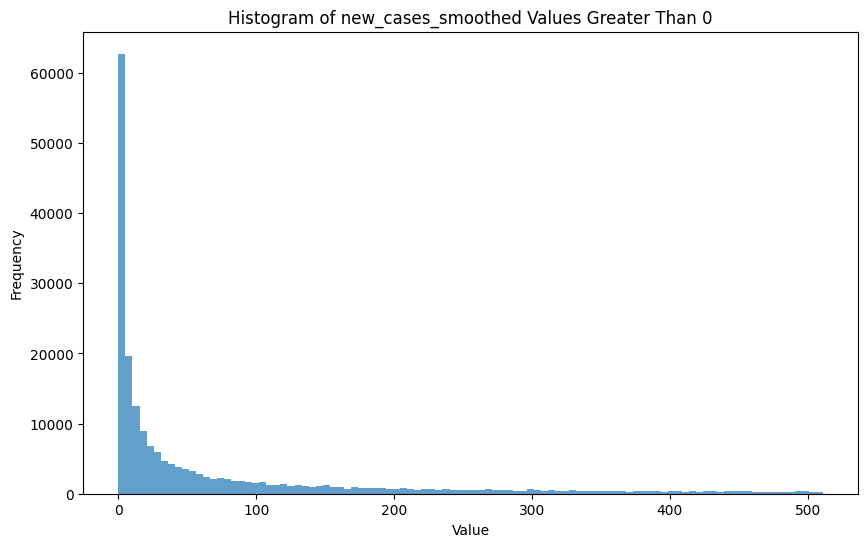

Count of 'new_cases_smoothed' values greater than 0: 272145
Percentage of 'new_cases_smoothed' values greater than 0: 67.54%


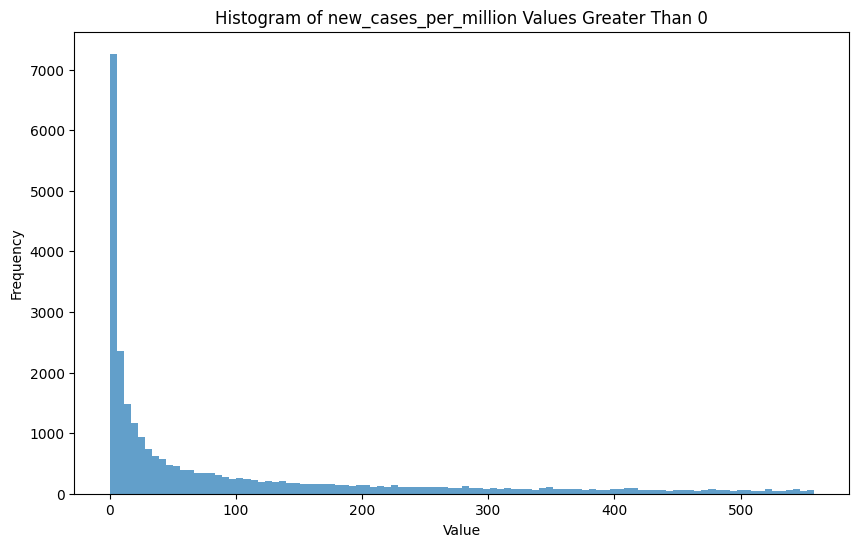

Count of 'new_cases_per_million' values greater than 0: 38929
Percentage of 'new_cases_per_million' values greater than 0: 9.66%


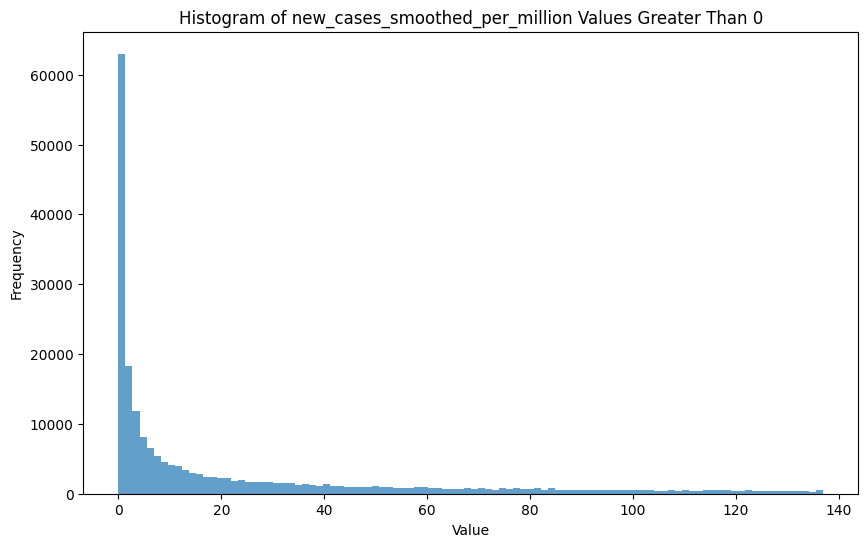

Count of 'new_cases_smoothed_per_million' values greater than 0: 272136
Percentage of 'new_cases_smoothed_per_million' values greater than 0: 67.54%


In [71]:
# List of columns to plot
columns_to_plot = ['new_cases', 'new_cases_smoothed', 'new_cases_per_million', 'new_cases_smoothed_per_million']

# Define the min and max values
min_value = 0
max_values = {
    'new_cases': 577,
    'new_cases_smoothed': 511,
    'new_cases_per_million': 558.23,
    'new_cases_smoothed_per_million': 136.89
}

# Create a plot for each column
for column in columns_to_plot:
    # Filter the DataFrame for values greater than 0 in the current column
    filtered_df = df[df[column] > 0]

    # Create histogram plot for the distribution of values greater than 0 in the current column
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df[column], bins=100, alpha=0.7, range=(min_value, max_values[column]))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} Values Greater Than 0')
    plt.show()

    # Calculate the count and percentage of values greater than 0 in the current column
    count_values = len(filtered_df[column])
    percentage_values = (count_values / len(df[column])) * 100

    print(f"Count of '{column}' values greater than 0: {count_values}")
    print(f"Percentage of '{column}' values greater than 0: {percentage_values:.2f}%")

In [102]:
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [103]:
df.iso_code.value_counts()

iso_code
169    3026
167    3024
178    3013
172    2983
171    2724
       ... 
177    1305
179    1198
127     795
165     691
62        1
Name: count, Length: 255, dtype: int64

In [101]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_with_more_than_65_percent_missing = missing_percentages[missing_percentages > 65].index.tolist()

# Drop the columns
df = df.drop(columns=columns_with_more_than_65_percent_missing)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  int64         
 1   continent                                   429435 non-null  int64         
 2   location                                    429435 non-null  int64         
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [130]:
df.describe().T

count  \
iso_code                                 429435.0   
continent                                429435.0   
location                                 429435.0   
date                                       429435   
total_cases                              411804.0   
...                                           ...   
population                               429435.0   
excess_mortality_cumulative_absolute      13411.0   
excess_mortality_cumulative               13411.0   
excess_mortality                          13411.0   
excess_mortality_cumulative_per_million   13411.0   

                                                                  mean  \
iso_code                                                    127.774725   
continent                                                     2.117333   
location                                                    126.061742   
date                                     1970-01-01 00:00:00.000000841   
total_cases                                             7365292.354484   
...                                                                ...   
population                                            152033640.396274   
excess_mortality_cumulative_absolute                        56047.6535   
excess_mortality_cumulative                                   9.766431   
excess_mortality                                             10.925353   
excess_mortality_cumulative_per_million                      1772.6664   

                                                         min  \
iso_code                                                 0.0   
continent                                                0.0   
location                                                 0.0   
date                                     1970-01-01 00:00:00   
total_cases                                              0.0   
...                                                      ...   
population                                              47.0   
excess_mortality_cumulative_absolute              -37726.098   
excess_mortality_cumulative                           -44.23   
excess_mortality                                      -95.92   
excess_mortality_cumulative_per_million           -2936.4531   

                                                                   25%  \
iso_code                                                          65.0   
continent                                                          1.0   
location                                                          63.0   
date                                     1970-01-01 00:00:00.000000429   
total_cases                                                    6280.75   
...                                                                ...   
population                                                    523798.0   
excess_mortality_cumulative_absolute                        176.500005   
excess_mortality_cumulative                                       2.06   
excess_mortality                                                  -1.5   
excess_mortality_cumulative_per_million                     116.872242   

                                                                   50%  \
iso_code                                                         129.0   
continent                                                          2.0   
location                                                         125.0   
date                                     1970-01-01 00:00:00.000000840   
total_cases                                                    63653.0   
...                                                                ...   
population                                                   6336393.0   
excess_mortality_cumulative_absolute                         6815.1987   
excess_mortality_cumulative                                       8.13   
excess_mortality                                                  5.66   
excess_mortality_cumulative_per_million       

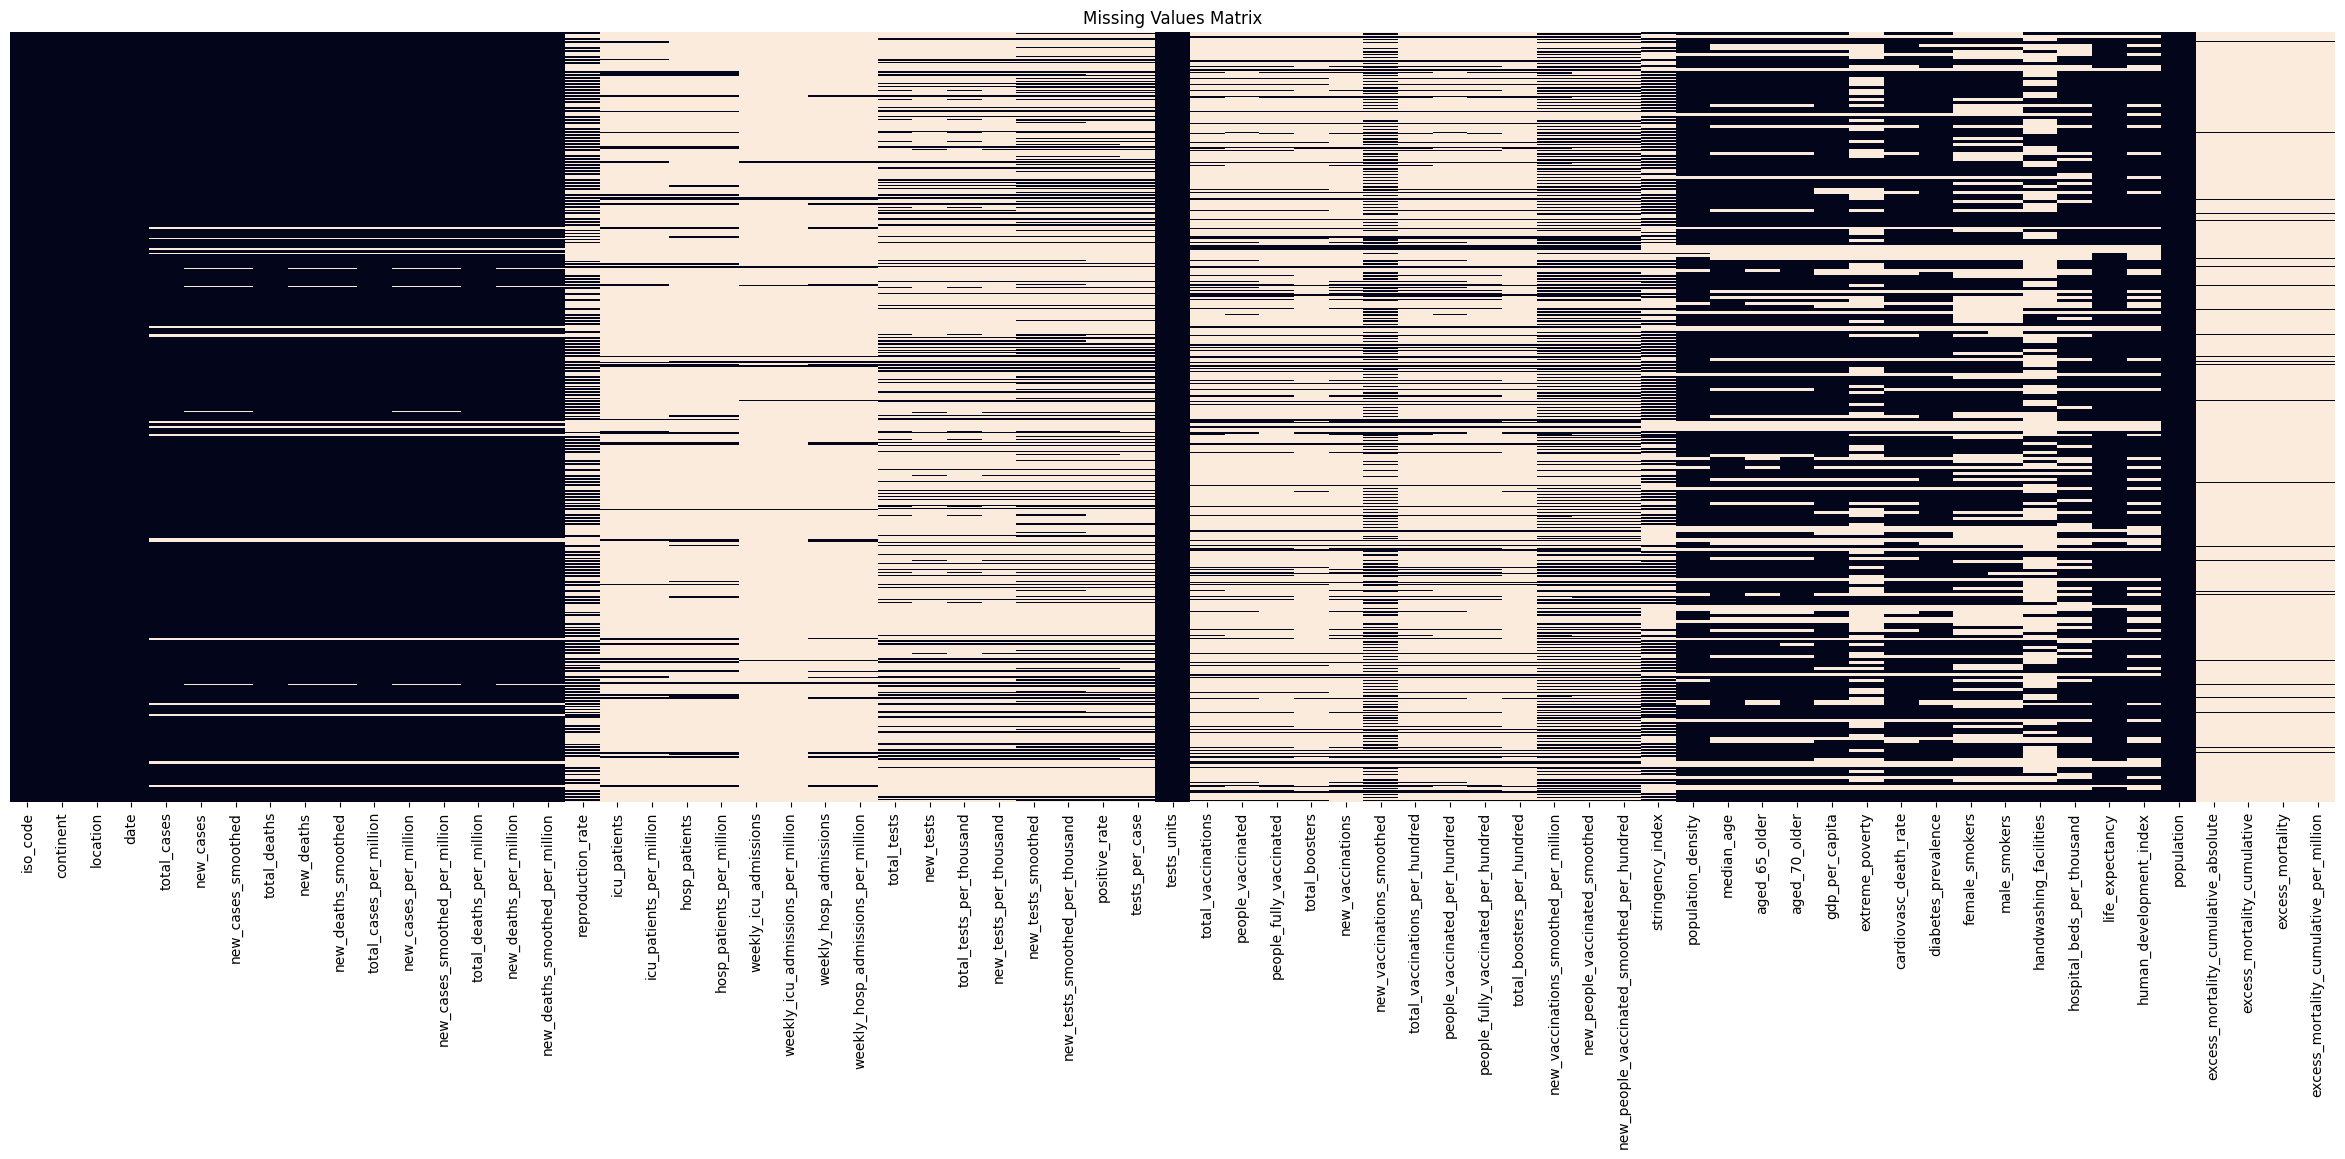

In [131]:
# plot to include all columns in the missing values matrix
plt.figure(figsize=(30, 10))  # Adjust the width and height as needed
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values Matrix')
plt.show()

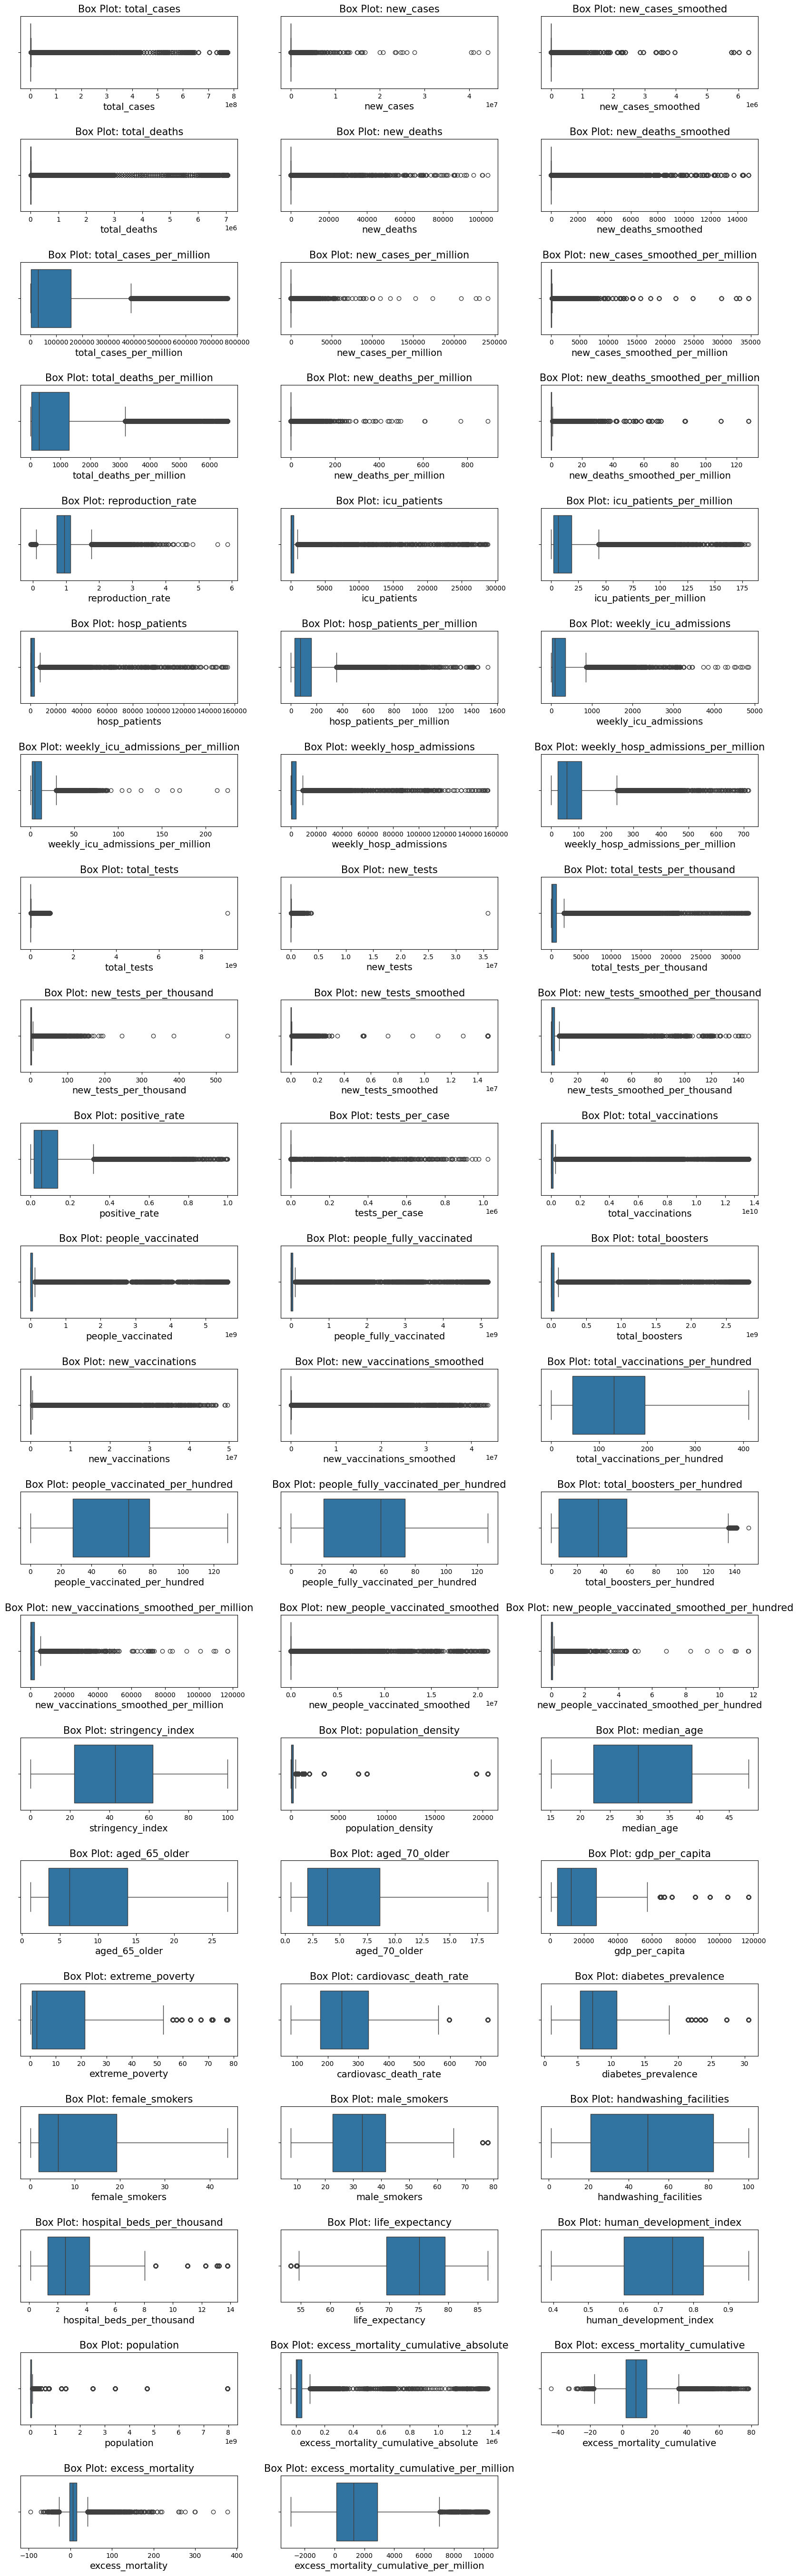

In [132]:
# Boxplot for outliers of reduced DF
plt.figure(figsize=(20, 200))

def outliers_boxplot(df):
    # Filter numerical_cols to keep only columns present in df
    cols_in_df = [col for col in numerical_cols if col in df.columns]
    for i, col in enumerate(cols_in_df):
        ax = plt.subplot(60, 3, i+1)
        sns.boxplot(data=df, x=col, ax=ax)
        plt.subplots_adjust(hspace=0.7)
        plt.title('Box Plot: {}'.format(col), fontsize=15)
        plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(df)
plt.show()

In [134]:
# Calculate Spearman correlation
correlation_matrix = df.corr(method='spearman', numeric_only=True)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

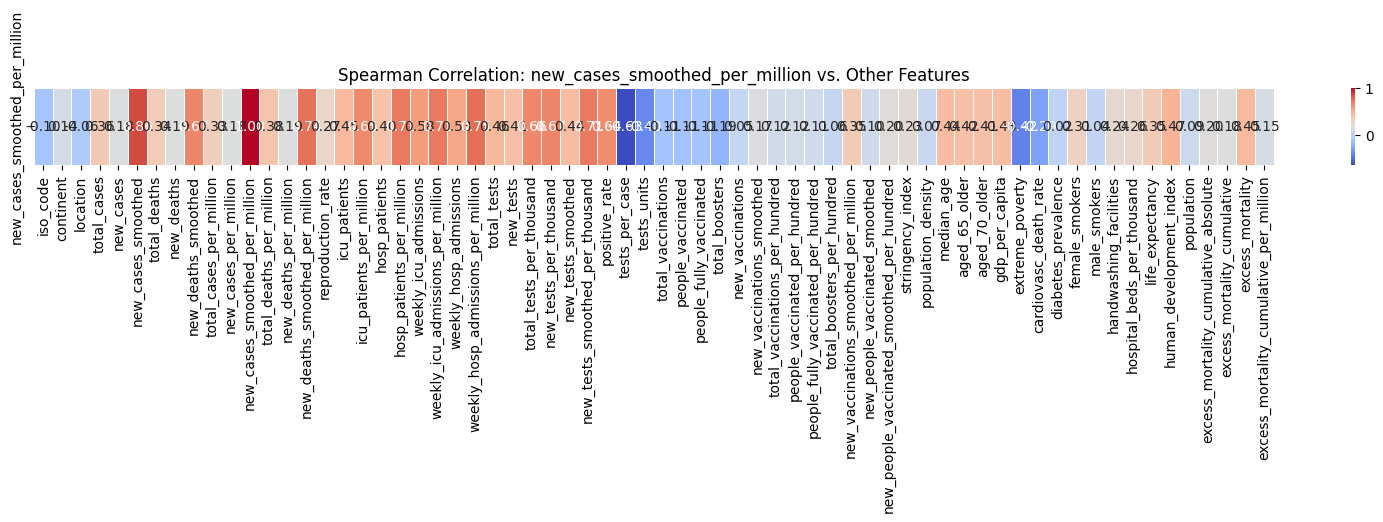

In [135]:
target_feature = 'new_cases_smoothed_per_million'

# Select the row corresponding to the target feature
target_feature_corr = correlation_matrix.loc[[target_feature]]

# Create a heatmap
plt.figure(figsize=(20, 1))  # Adjust figure size for a single row
sns.heatmap(target_feature_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Spearman Correlation: {target_feature} vs. Other Features')
plt.show()

In [136]:
#Outlier detetcion, reporting and replcing with nan

import pandas as pd
import numpy as np

# Assuming your DataFrame 'df' is already loaded

columns_to_transform = [
    'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
    'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
    'new_cases_per_million', 'new_cases_smoothed_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'new_deaths_smoothed_per_million', 'new_vaccinations_smoothed',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred', 'population_density',
    'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
    'diabetes_prevalence', 'female_smokers', 'male_smokers',
    'handwashing_facilities', 'hospital_beds_per_thousand', 'population'
]

columns_not_to_transform = [
    'reproduction_rate', 'tests_units', 'stringency_index', 'median_age',
    'aged_65_older', 'aged_70_older', 'life_expectancy', 'human_development_index'
]

# Step 1: Log1p Transformation (for columns to transform)
for col in columns_to_transform:
    df[col] = np.log1p(df[col])
    print(f"Log1p transformation applied to {col}.")

# Step 2: Outlier Detection and Reporting (for all columns)
def outliers_df(df, columns):
    """Detects and reports outliers using IQR."""
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in columns:
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers  # Removed the filtering condition

outliers_df_result_transformed = outliers_df(df, columns_to_transform).sort_values('Percent', ascending=False)
print("Outliers in transformed columns:\n", outliers_df_result_transformed)

outliers_df_result_not_transformed = outliers_df(df, columns_not_to_transform).sort_values('Percent', ascending=False)
print("\nOutliers in not transformed columns:\n", outliers_df_result_not_transformed)

# Step 3: Replace Outliers with NaN (for all columns)
for col in columns_to_transform + columns_not_to_transform:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df[col] = np.where((df[col] > upper_limit) | (df[col] < lower_limit), np.nan, df[col])

print("\nOutliers replaced with NaN.")

Log1p transformation applied to total_cases.
Log1p transformation applied to new_cases.
Log1p transformation applied to new_cases_smoothed.
Log1p transformation applied to total_deaths.
Log1p transformation applied to new_deaths.
Log1p transformation applied to new_deaths_smoothed.
Log1p transformation applied to total_cases_per_million.
Log1p transformation applied to new_cases_per_million.
Log1p transformation applied to new_cases_smoothed_per_million.
Log1p transformation applied to total_deaths_per_million.
Log1p transformation applied to new_deaths_per_million.
Log1p transformation applied to new_deaths_smoothed_per_million.
Log1p transformation applied to new_vaccinations_smoothed.
Log1p transformation applied to new_vaccinations_smoothed_per_million.
Log1p transformation applied to new_people_vaccinated_smoothed.
Log1p transformation applied to new_people_vaccinated_smoothed_per_hundred.
Log1p transformation applied to population_density.
Log1p transformation applied to gdp_per_

<Figure size 2000x1200 with 0 Axes>

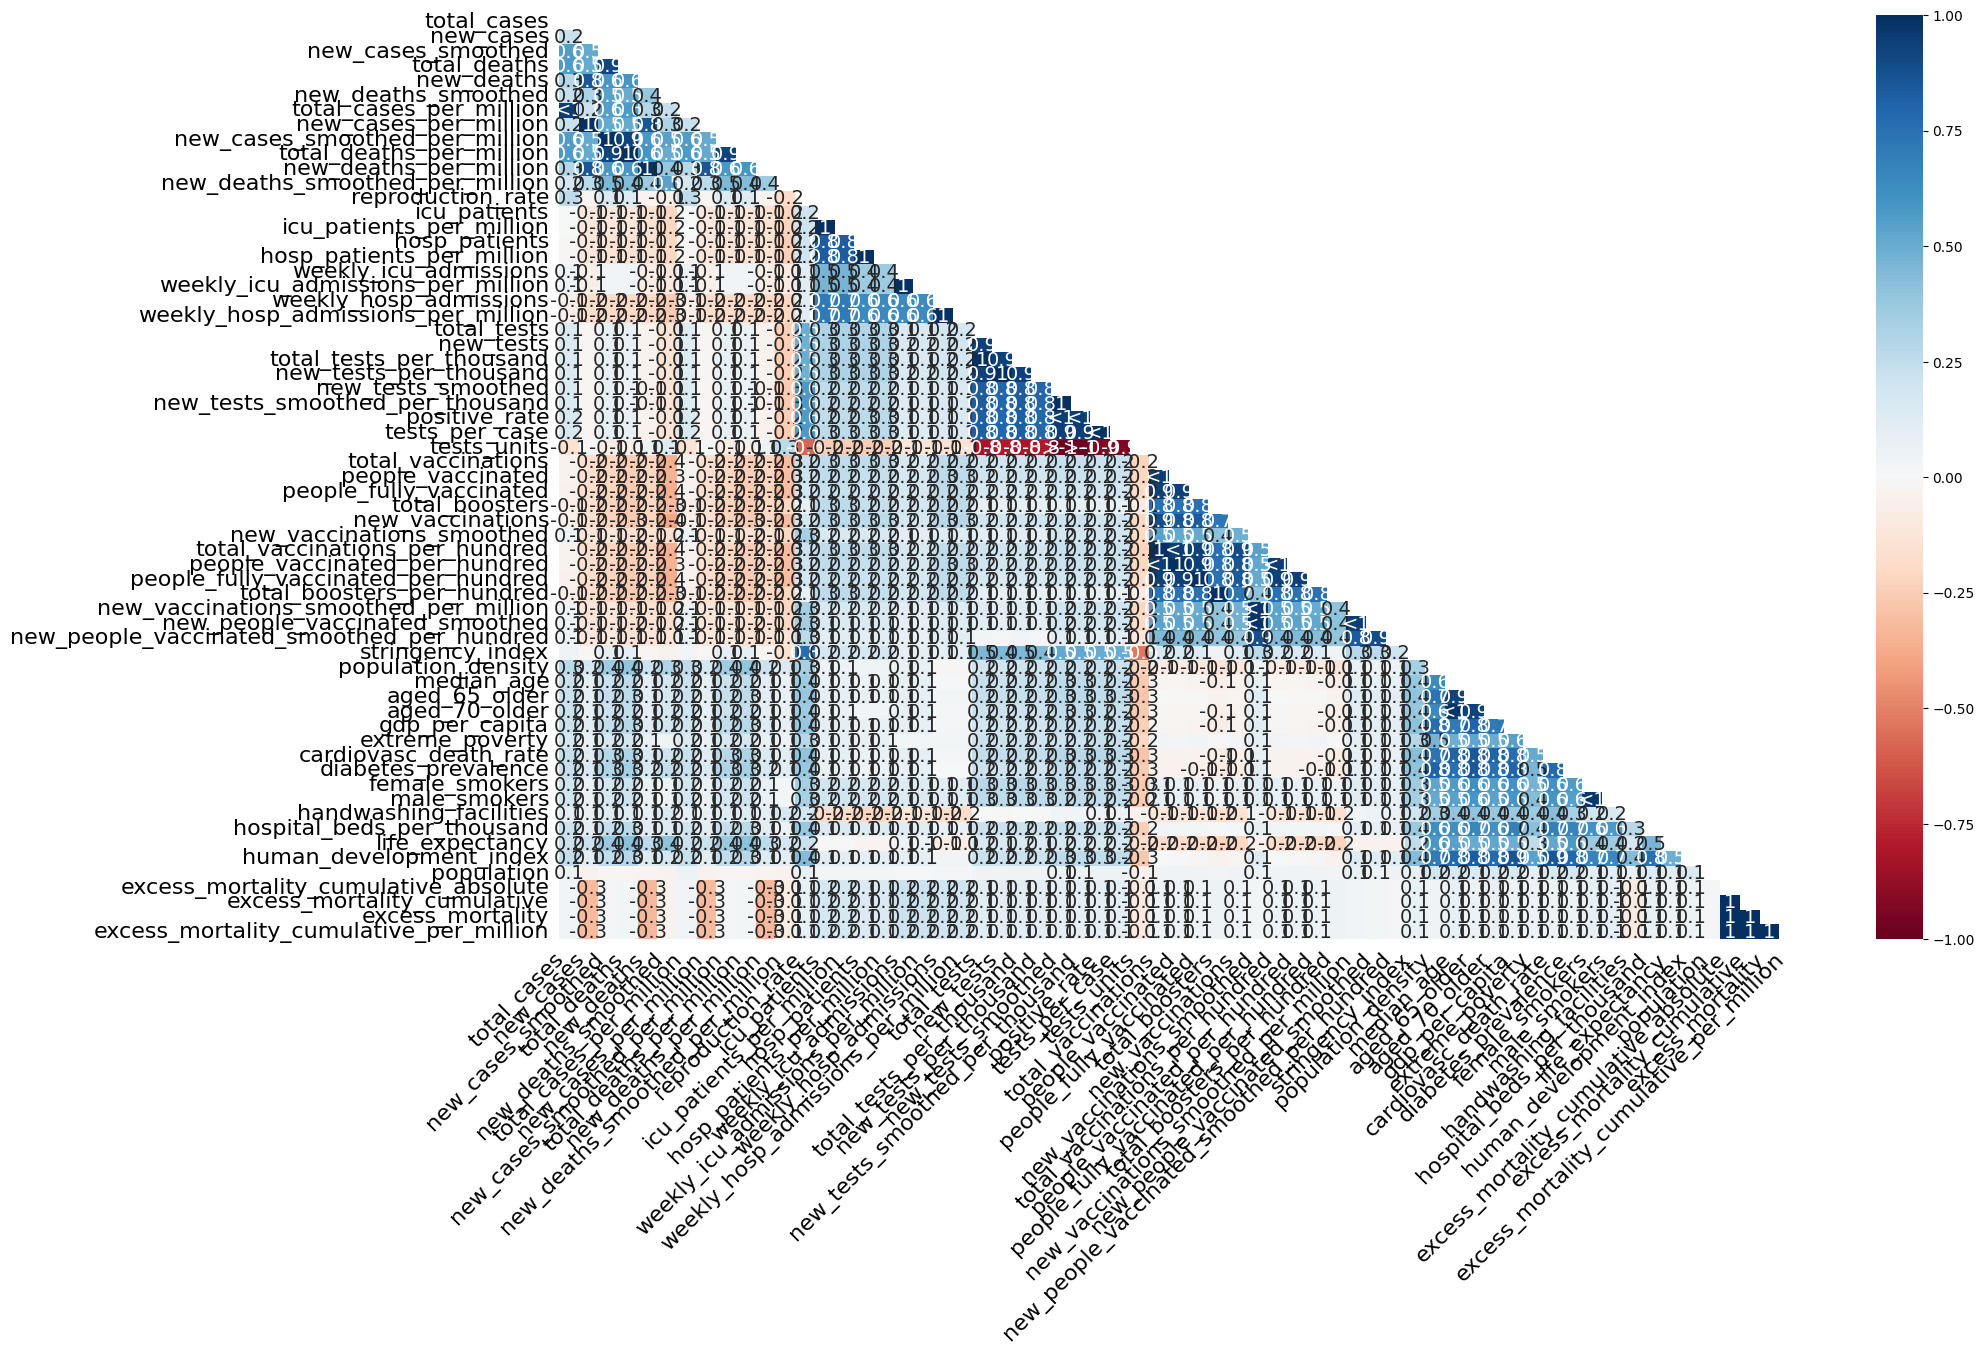

In [140]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


# Find columns with missing data
missingdata_df = df.columns[df.isnull().any()].tolist()

# Create the missingness correlation heatmap
plt.figure(figsize=(20, 12))  # Adjust figsize as needed
msno.heatmap(df[missingdata_df])
plt.show()

In [141]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# MICE Imputation for numerical columns
imputer_mice = IterativeImputer(random_state=42)
df[numeric_cols] = imputer_mice.fit_transform(df[numeric_cols])

print("MICE imputation applied to numerical columns.")

# Impute 'tests_units' with mode
mode_imputer = SimpleImputer(strategy='most_frequent')
df['tests_units'] = mode_imputer.fit_transform(df[['tests_units']])

print("'tests_units' imputed with mode.")

# Optional: Visualize distributions before and after imputation
# import matplotlib.pyplot as plt
# for col in numeric_cols:
#     plt.figure()
#     df[col].hist(bins=20, alpha=0.5, label='Imputed')
#     df_original[col].hist(bins=20, alpha=0.5, label='Original') #If you saved a copy of the original df
#     plt.legend()
#     plt.title(col)
#     plt.show()

# Optional: Create missing value flags
for col in df.columns:
    if df[col].isnull().any():
        df[col + '_missing'] = np.where(df[col].isnull(), 1, 0)

print("Missing value flags created.")

MICE imputation applied to numerical columns.
'tests_units' imputed with mode.
Missing value flags created.


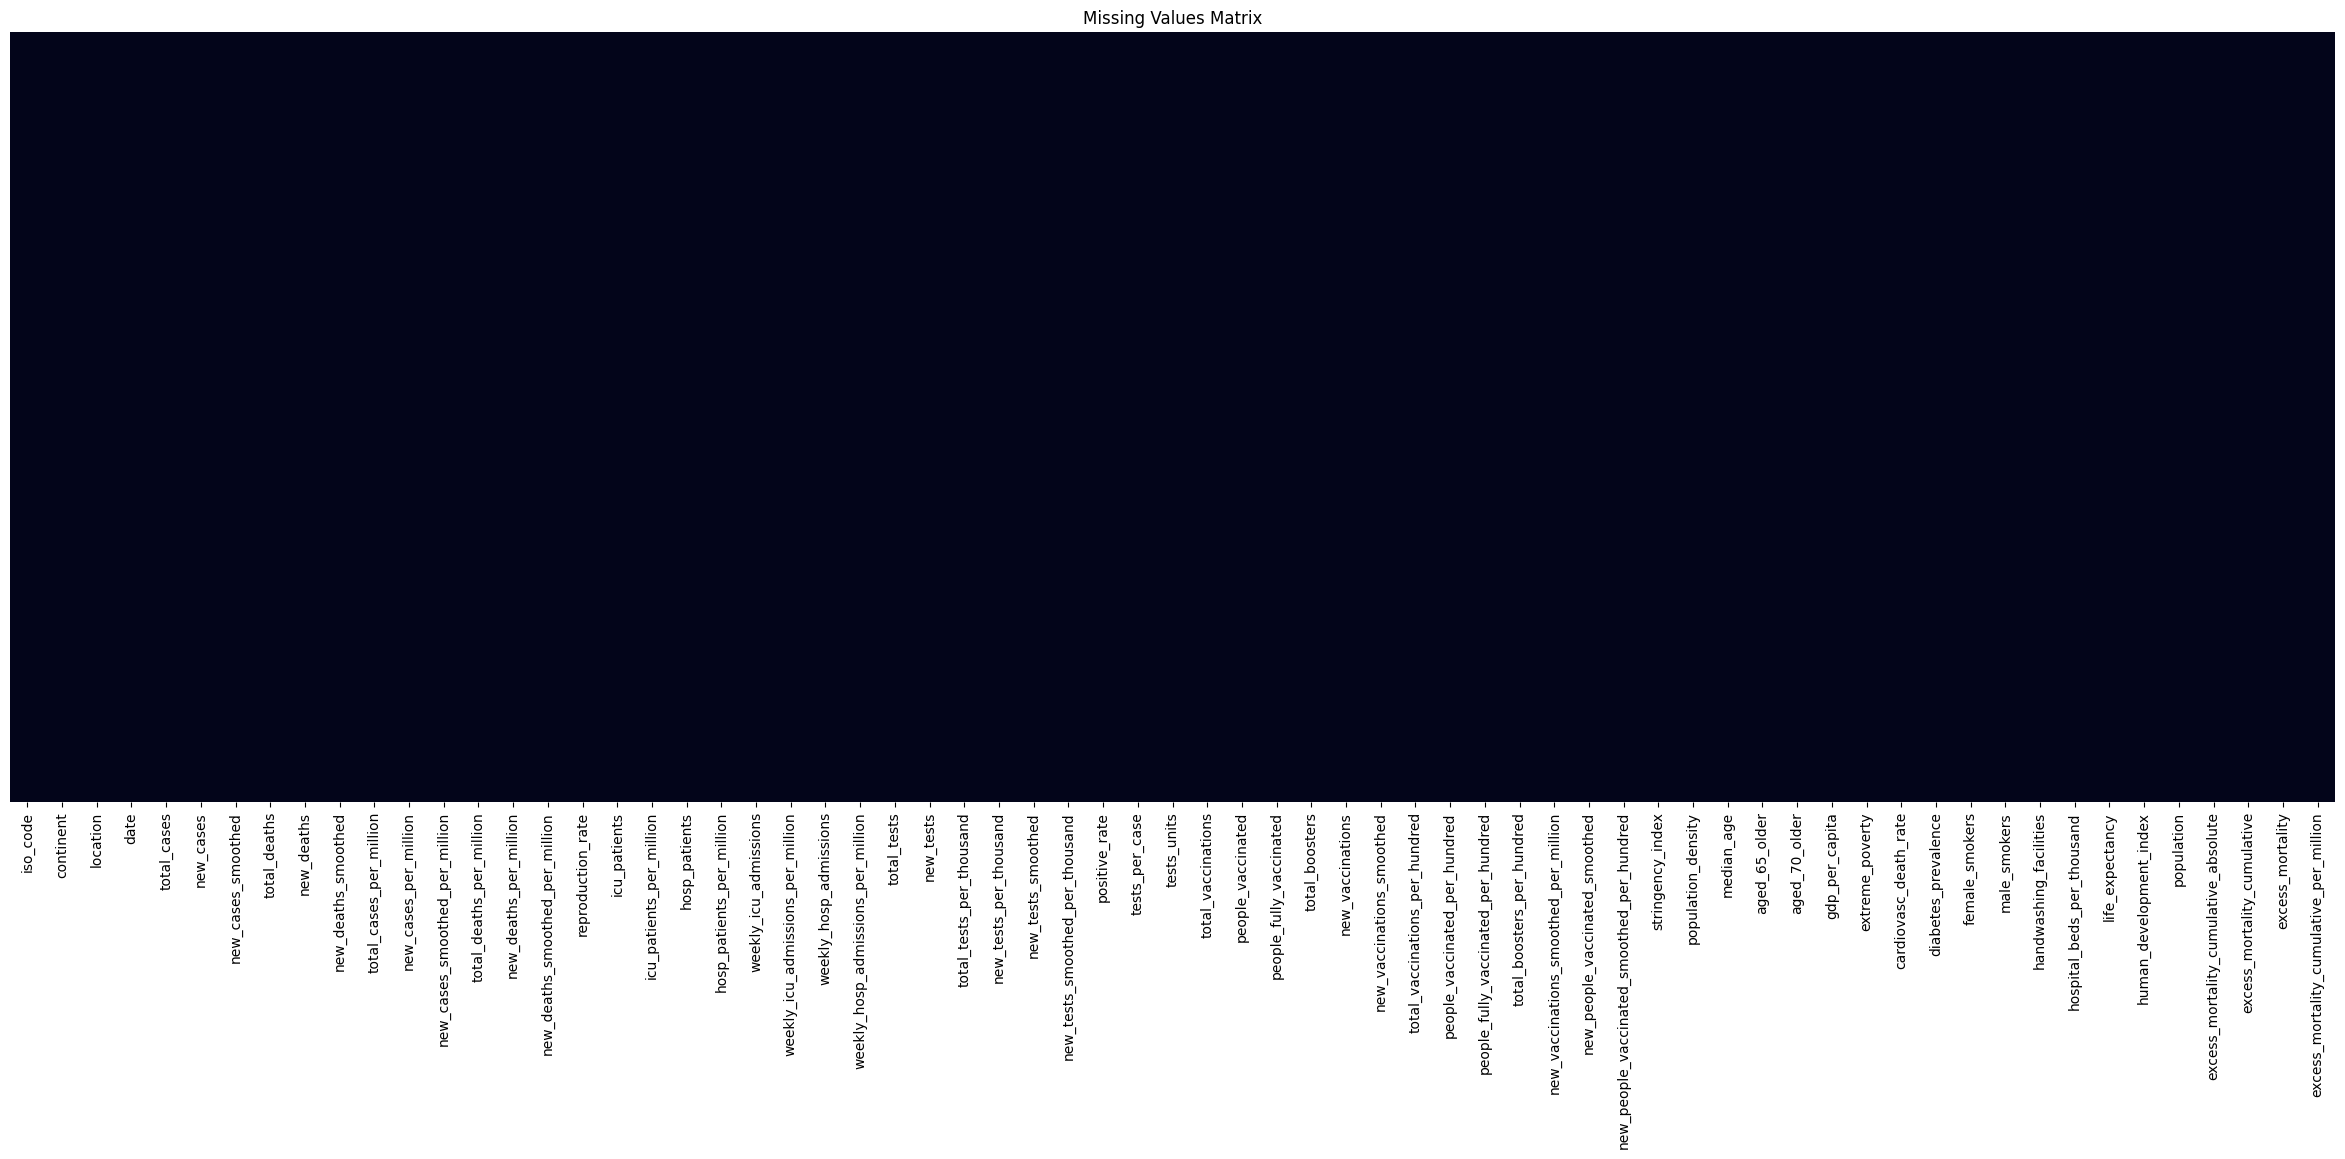

In [142]:
# plot to include all columns in the missing values matrix
plt.figure(figsize=(30, 10))  # Adjust the width and height as needed
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values Matrix')
plt.show()

In [107]:
# Specify the path where you want to save the pickle file in your Drive
drive_path = '/content/drive/MyDrive/Covid_ML/'  # You can change this path

# Create the directory if it doesn't exist
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Save the DataFrame to a pickle file in Google Drive
file_path = os.path.join(drive_path, 'df_cleaned.pkl') #changed filename
with open(file_path, 'wb') as f:
    pickle.dump(df, f)

print(f"DataFrame saved to {file_path}")

DataFrame saved to /content/drive/MyDrive/Covid_ML/df_cleaned.pkl
